# Age and Cardiovascular Disease

<span style="color:#83898b">*Examining the Correlation Between Age and Heart Disease Prevalence*</span>

<span style="color:#83898b">Richard Wu - 100914490 </span>

# Introduction

Cardiovascular diseases (CVD) remains one of the most significant public health challenges, claiming millions of lives every year. Sometimes people have this serious health condition without even knowing which can cost them the long term. These conditions, which include heart disease and stroke, are influenced by a range of factors such as age, lifestyle, and physiological markers like blood pressure and cholesterol. Understanding the relationship between these factors and the onset of CVD is critical for prevention and early intervention. [1]

In this assignment, I analyzed a dataset that observes studies on cardiovascular health. With 918 records and 12 attributes, the dataset offers valuable insights into key variables such as age, blood pressure, cholesterol, and resting-BP. By exploring the data, we aim to address an important question: does the likelihood of heart disease increase with age? 

![Heart Disease](https://cardiovascularbusiness.com/sites/default/files/styles/top_stories/public/2021-05/iStock-1141130339.jpg.webp?itok=tv2qWaDz) [4]

###### * Image Source: https://cardiovascularbusiness.com/topics/clinical/acute-coronary-syndromes/study-signs-most-common-symptoms-6-cardiovascular-diseases *


# Method

## Data Collection:

In [19]:

#Importing the Necessary Libraies/Modules. 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats


In [20]:
#Loading the data [2]
data = pd.read_csv('heart.csv') 

data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


### **Dataset Attribute Definitions**

1. **Age**  
   *Definition*: The age of the patient in years. [2]  
   *Explanation*: How old the individual is.

2. **Sex**  
   *Definition*: The biological sex of the patient: [2]  
   - **M**: Male  
   - **F**: Female  
   *Explanation*: Sex of the individual.

3. **ChestPainType**  
   *Definition*: The type of chest pain experienced by the patient: [2]  
   - **TA**: Typical Angina (chest pain caused by reduced blood flow to the heart)  [2]  
   - **ATA**: Atypical Angina (chest pain not related to the heart)  [2]  
   - **NAP**: Non-Anginal Pain (pain unrelated to the heart or angina) [2]  
   - **ASY**: Asymptomatic (no chest pain reported)  [2]  
   *Explanation*: Different types of chest pain can indicate varying degrees of cardiac issues or other conditions, and this attribute is key in diagnosing heart disease.

4. **RestingBP**  
   *Definition*: Resting blood pressure measured in mm Hg (millimeters of mercury). [2]  
   *Explanation*: Resting blood pressure is a standard measure of cardiovascular health; high or low values can signal potential heart conditions.

5. **Cholesterol**  
   *Definition*: Serum cholesterol level measured in mg/dL (milligrams per deciliter). [2]  
   *Explanation*: High cholesterol is a well-known risk factor for heart disease, as it can lead to plaque buildup in arteries, reducing blood flow to the heart.

6. **FastingBS**  
   *Definition*: Indicates whether the patient’s fasting blood sugar is greater than 120 mg/dL: [2]  
   - **1**: Fasting blood sugar > 120 mg/dL  [2]  
   - **0**: Fasting blood sugar ≤ 120 mg/dL  [2]  
   *Explanation*: Elevated fasting blood sugar is often associated with diabetes, a condition that significantly increases the risk of heart disease.

7. **RestingECG**  
   *Definition*: Resting electrocardiogram results: [2]  
   - **Normal**: No significant abnormalities.  [2]  
   - **ST**: ST-T wave abnormalities (e.g., T wave inversions or ST elevation/depression > 0.05 mV). [2]  
   - **LVH**: Left ventricular hypertrophy (based on Estes' criteria). [2]  
   *Explanation*: An ECG helps detect abnormalities in the heart's electrical activity, providing insights into potential cardiac issues.

8. **MaxHR**  
   *Definition*: Maximum heart rate achieved during exercise, ranging between 60 and 202 bpm (beats per minute). [2]  
   *Explanation*: Measuring the maximum heart rate during exercise tests the heart's ability to pump blood effectively, helping to identify conditions like ischemia.

9. **ExerciseAngina**  
   *Definition*: Indicates whether the patient experienced angina during exercise: [2]  
   - **Y**: Yes  
   - **N**: No  
   *Explanation*: Exercise-induced angina is a symptom of reduced blood flow to the heart, typically caused by blockages in coronary arteries.

10. **Oldpeak**  
    *Definition*: ST segment depression induced by exercise relative to rest, measured in numeric units. [2]  
    *Explanation*: ST depression is a key indicator in stress tests, often used to assess the severity of ischemia or other heart-related conditions.

11. **ST_Slope**  
    *Definition*: The slope of the peak exercise ST segment: [2]  
    - **Up**: Upsloping  
    - **Flat**: Flat slope  
    - **Down**: Downsloping  
    *Explanation*: The ST slope indicates the heart's response to stress. A flat or downsloping ST segment often correlates with more severe heart issues.

12. **HeartDisease**  
    *Definition*: Output class indicating whether the patient has heart disease: [2]  
    - **1**: Diagnosed with heart disease  
    - **0**: Normal (no heart disease)  
    *Explanation*: This is the target variable in the dataset and represents whether the patient has been diagnosed with heart disease.


In [21]:
#Data types of the data set.
data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

## Cleaning Data and Processing 

Minimal data cleaning and preprocessing were performed on the dataset. Ages greater than 70 were removed, as they were considered outliers due to their lower frequency compared to the rest of the data, which could potentially skew the analysis. I also checked for missing values, ensured that all columns contained the same number of records, and identified any duplicates that might affect the integrity of the data. No columns were renamed, as the existing names were deemed appropriate, and the order of the columns was maintained as it appeared suitable for analysis.

In [22]:
# Check for missing values in each column
missing_values = data.isna().sum()

#Check count of each column to check for consistent data
non_null_counts = data.count()

#Checking for any duplicates that 
duplicate_count = data.duplicated().sum()

#Briefly examine the data to make sure statiistics make sense
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [23]:
#Removing outliers.
data = data[data['Age'] < 70]

In [24]:
#Channging from binary to boolean values so its more appealing to the reader.
data.loc[:, 'FastingBS'] = data['FastingBS'].map({1: True, 0: False})


In [25]:
data = data.copy()
# Check for number of entries with 0 levels of cholesterol
zero_cholesterol_count = data[data['Cholesterol'] == 0].shape[0]

# Create age groups
data['Age_Group'] = pd.cut(
    data['Age'], 
    bins=[0, 30, 40, 50, 60, 70, 80, 90], 
    labels=['<30', '30-40', '40-50', '50-60', '60-70', '70-80', '80+']
)

# Calculate median cholesterol for each age group (excluding zeros)
group_median = data.loc[data['Cholesterol'] != 0].groupby('Age_Group')['Cholesterol'].median()

# Replace 0 cholesterol values with the median for their age group
data.loc[data['Cholesterol'] == 0, 'Cholesterol'] = data.loc[data['Cholesterol'] == 0, 'Age_Group'].map(group_median)


In [26]:
#Change from 'Y' and 'N' to 'Yes' and 'No to make it more appealing.
data['ExerciseAngina'] = data['ExerciseAngina'].map({'Y': 'Yes', 'N': 'No'})


# Analysis 

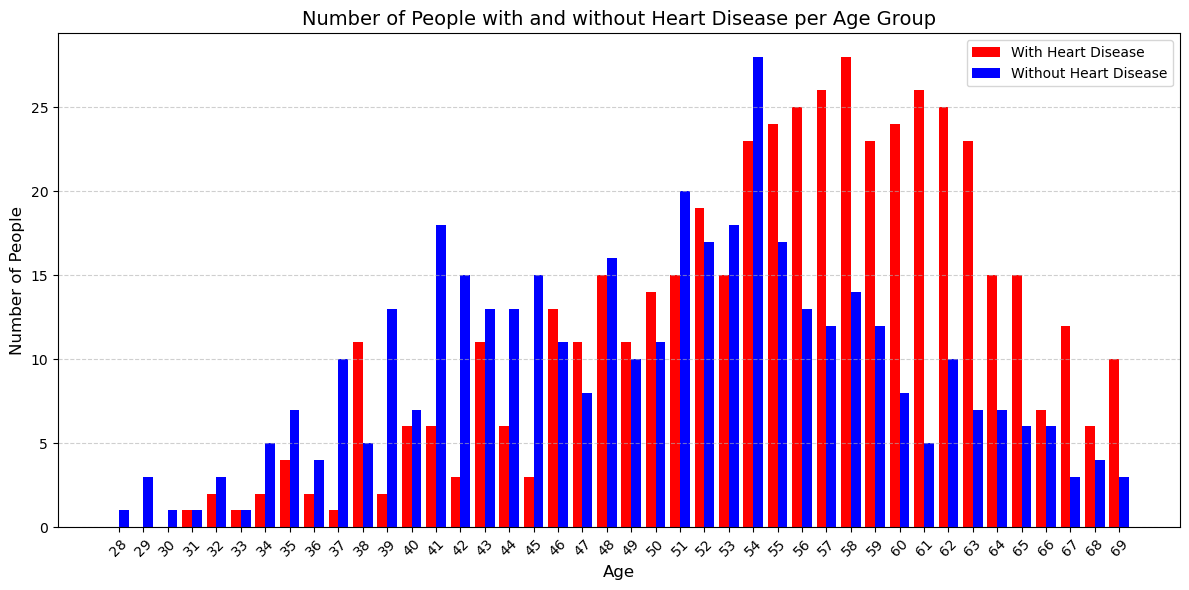

In [27]:
heart_disease_data = data[data['HeartDisease'] == 1]

# Group the heart disease data by 'Age' and count the number of people in each age group
heart_disease_per_age = heart_disease_data.groupby('Age').size()

no_heart_disease_data = data[data['HeartDisease'] == 0]  
no_heart_disease_per_age = no_heart_disease_data.groupby('Age').size()

# Align the age groups by reindexing both to have the same range of ages
all_ages = sorted(set(heart_disease_per_age.index).union(set(no_heart_disease_per_age.index)))
heart_disease_per_age = heart_disease_per_age.reindex(all_ages, fill_value=0)
no_heart_disease_per_age = no_heart_disease_per_age.reindex(all_ages, fill_value=0)

x = np.arange(len(all_ages))
plt.figure(figsize=(12, 6))

plt.bar(x - 0.2, heart_disease_per_age.values, width=0.4, label='With Heart Disease', color='red')
plt.bar(x + 0.2, no_heart_disease_per_age.values, width=0.4, label='Without Heart Disease', color='blue')

plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of People', fontsize=12)
plt.title('Number of People with and without Heart Disease per Age Group', fontsize=14)
plt.xticks(x, all_ages, rotation=45)
plt.legend()

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


First, let's examine the age demographics across the dataset for individuals with and without heart disease. As age increases, the number of people with heart disease rises significantly compared to those without it, indicating a potential correlation between age and the prevalence of heart disease.

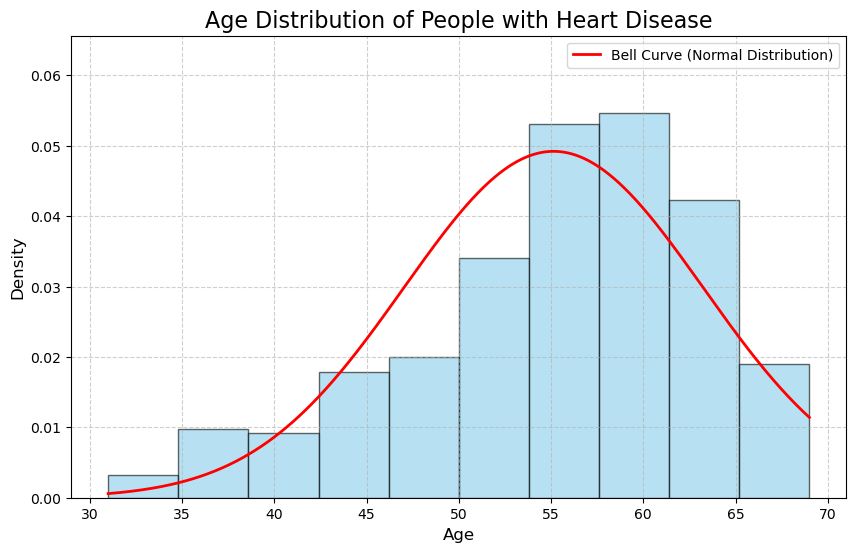

In [28]:
heart_disease_data = data[data['HeartDisease'] == 1]['Age']

# Calculate the mean and standard deviation for the ages
mean = np.mean(heart_disease_data)
std_dev = np.std(heart_disease_data)

n_bins = int(np.ceil(np.log2(len(heart_disease_data)) + 1))

plt.figure(figsize=(10, 6))

# Create histogram
count, bins, ignored = plt.hist(heart_disease_data, bins=n_bins, density=True, alpha=0.6, color='skyblue', edgecolor='black')

# Create a bell curve using the mean and standard deviation
x = np.linspace(min(heart_disease_data), max(heart_disease_data), 1000)
y = stats.norm.pdf(x, mean, std_dev)

plt.plot(x, y, 'r-', lw=2, label='Bell Curve (Normal Distribution)')

plt.title('Age Distribution of People with Heart Disease', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(loc='upper right')
plt.xlim(min(heart_disease_data) - 2, max(heart_disease_data) + 2)
plt.ylim(0, max(count) * 1.2)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


The histogram highlights the age distribution of individuals with heart disease. The bell curve overlay shows the highest population density in the 55-60 year-old age group, suggesting that heart disease is most prevalent in this demographic.

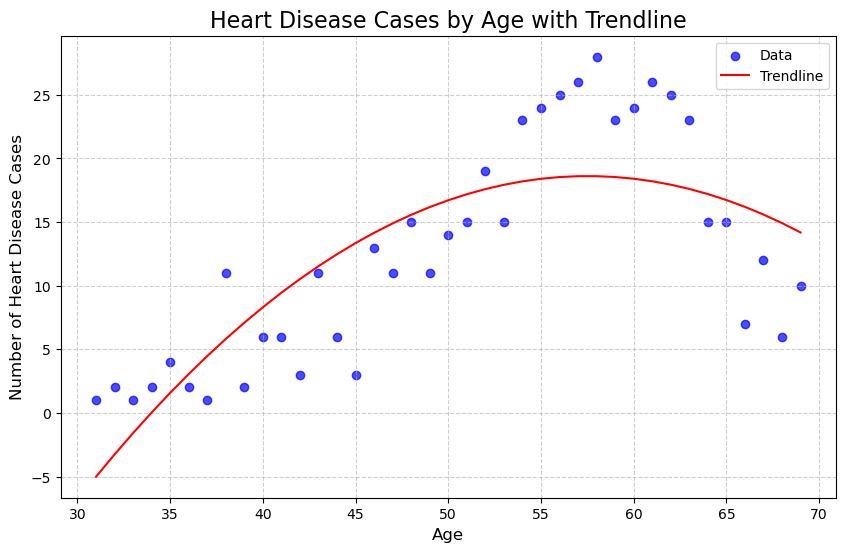

In [29]:
# Scatter Plot: Age vs. Heart Disease

age_heart_disease = data[data['HeartDisease'] == 1].groupby('Age').size()

z = np.polyfit(age_heart_disease.index, age_heart_disease.values, 2)  
p = np.poly1d(z)
plt.figure(figsize=(10, 6))
plt.scatter(age_heart_disease.index, age_heart_disease.values, color='blue', alpha=0.7, label='Data')
plt.plot(age_heart_disease.index, p(age_heart_disease.index), color='red', label='Trendline')
plt.title('Heart Disease Cases by Age with Trendline', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Heart Disease Cases', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


The scatter plot visualizes the number of heart disease cases by age. The upward trend demonstrates that as age increases, so does the likelihood of heart disease, with the trendline further supporting the correlation observed in the previous bar chart.

<Figure size 1000x600 with 0 Axes>

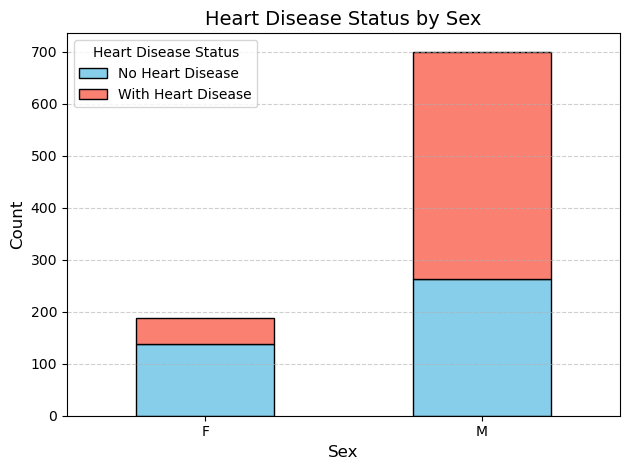

In [30]:
# Group data by Sex and HeartDisease
gender_heart_disease = data.groupby(['Sex', 'HeartDisease']).size().unstack()

# Create a stacked bar chart
plt.figure(figsize=(10, 6))
gender_heart_disease.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], edgecolor='black')

plt.title('Heart Disease Status by Sex', fontsize=14)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.legend(['No Heart Disease', 'With Heart Disease'], title='Heart Disease Status')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


In [31]:
gender_counts = data['Sex'].value_counts()
total_males = gender_counts['M']
total_females = gender_counts['F']

# Number of males and females with heart disease
males_with_heart_disease = data[data['Sex'] == 'M']['HeartDisease'].sum()
females_with_heart_disease = data[data['Sex'] == 'F']['HeartDisease'].sum()

# Number of males and females without heart disease
males_without_heart_disease = total_males - males_with_heart_disease
females_without_heart_disease = total_females - females_with_heart_disease

percent_males_with_heart_disease = (males_with_heart_disease / total_males) * 100
percent_females_with_heart_disease = (females_with_heart_disease / total_females) * 100

percent_males_without_heart_disease = 100 - percent_males_with_heart_disease
percent_females_without_heart_disease = 100 - percent_females_with_heart_disease

print("Percentage of Males and Females with and without Heart Disease:")
print(f"Male with Heart Disease: {percent_males_with_heart_disease:.2f}%")
print(f"Male without Heart Disease: {percent_males_without_heart_disease:.2f}%")
print(f"Female with Heart Disease: {percent_females_with_heart_disease:.2f}%")
print(f"Female without Heart Disease: {percent_females_without_heart_disease:.2f}%")


Percentage of Males and Females with and without Heart Disease:
Male with Heart Disease: 62.43%
Male without Heart Disease: 37.57%
Female with Heart Disease: 26.20%
Female without Heart Disease: 73.80%


The stacked bar chart compares the number of males and females who have heart disease versus those who do not. It shows that the male population makes up the majority of the dataset, from the calculated values males represent approximately 79% and females 21%. Within these groups, a higher proportion of males (63.17%) have heart disease compared to females (25.91%). This suggests that heart disease is more prevalent among males in this dataset. Moreover, 36.83% of males do not have heart disease, while 74.09% of females do not have heart disease, indicating that heart disease is less prevalent among females in this dataset.

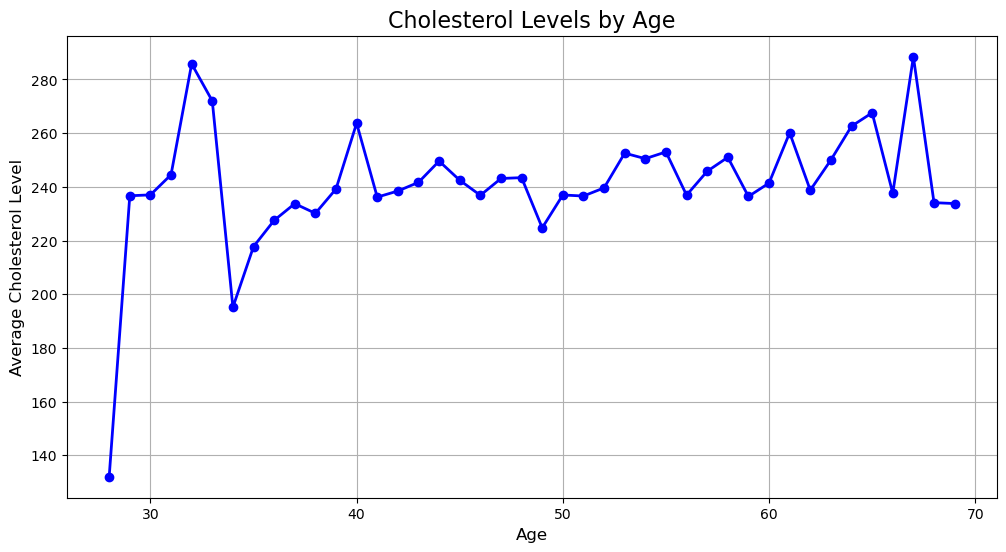

In [32]:
cholesterol_by_age = data.groupby('Age')['Cholesterol'].mean()

# Plot the trend of cholesterol levels by age
plt.figure(figsize=(12, 6))
plt.plot(cholesterol_by_age.index, cholesterol_by_age.values, marker='o', color='b', linestyle='-', linewidth=2)

plt.title('Cholesterol Levels by Age', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Average Cholesterol Level', fontsize=12)
plt.grid(True)
plt.show()


Next, we analyze cholesterol levels across different age groups, as cholesterol is a known contributor to heart disease. The graph indicates an increasing trend in cholesterol levels with age, which eventually levels off at older ages.

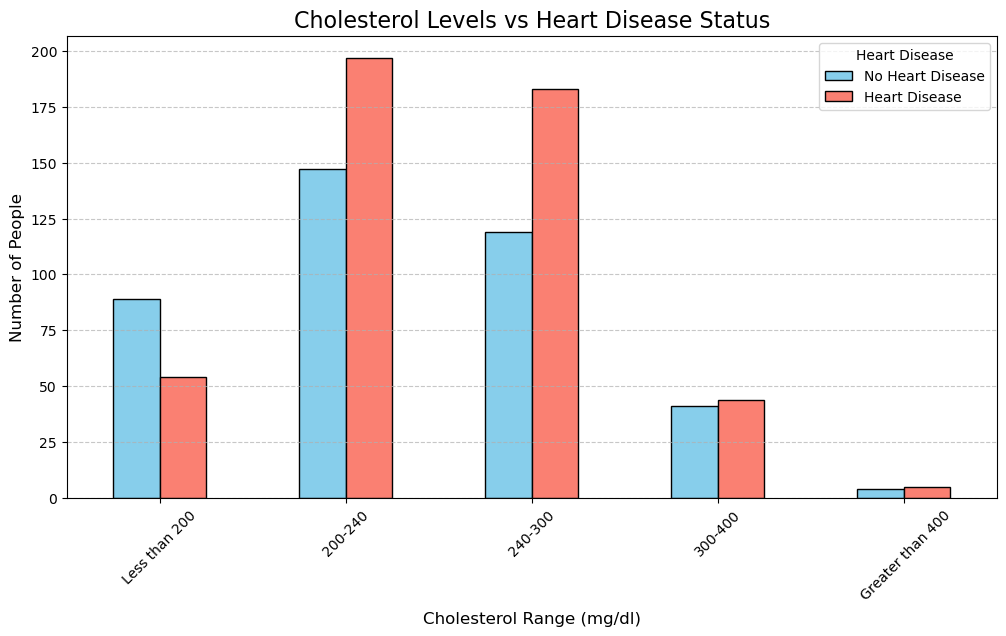

In [33]:
bins = [0, 200, 240, 300, 400, 500]  
labels = ['Less than 200', '200-240', '240-300', '300-400', ' Greater than 400']

data.loc[:, 'Cholesterol_Range'] = pd.cut(data['Cholesterol'], bins=bins, labels=labels, include_lowest=True)
grouped = data.groupby(['Cholesterol_Range', 'HeartDisease']).size().unstack()
grouped.plot(kind='bar', figsize=(12, 6), color=['skyblue', 'salmon'], edgecolor='black')

plt.title('Cholesterol Levels vs Heart Disease Status', fontsize=16)
plt.xlabel('Cholesterol Range (mg/dl)', fontsize=12)
plt.ylabel('Number of People', fontsize=12)
plt.xticks(rotation=45)
plt.legend(['No Heart Disease', 'Heart Disease'], title='Heart Disease', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


Next, we analyze cholesterol levels in individuals with and without heart disease, as high levels of cholesterol is a known factor for heart disease. The graph reveals that individuals with higher cholesterol levels tend to have a greater number of heart disease cases. Those with cholesterol levels below 200 are associated with a higher number of people without heart disease, whereas individuals with cholesterol levels above 200 show a higher prevalence of heart disease.

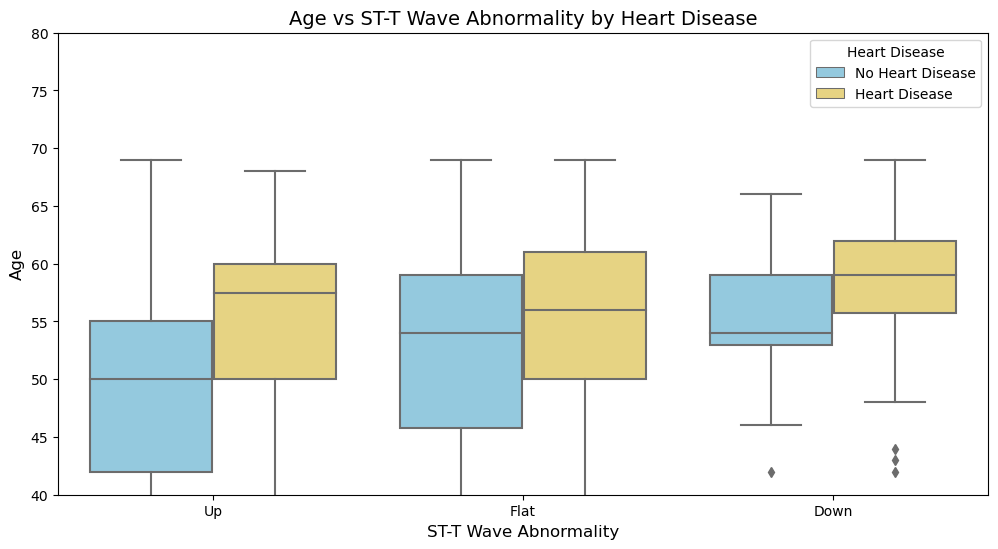

In [34]:
data['HeartDisease'] = data['HeartDisease'].map({1: 'Heart Disease', 0: 'No Heart Disease'})

# Box plot for Age vs ST-T Wave Abnormality
plt.figure(figsize=(12, 6))
sns.boxplot(x="ST_Slope", y="Age", hue="HeartDisease", data=data, palette=['skyblue', '#F7DD72'])
plt.title("Age vs ST-T Wave Abnormality by Heart Disease", fontsize=14)
plt.xlabel("ST-T Wave Abnormality", fontsize=12)
plt.ylabel("Age", fontsize=12)
plt.legend(title="Heart Disease", loc="upper right")
plt.ylim(40, 80)  
plt.show()


From the boxplot we can interpret that there are trends between ST-T wave abnormality (ST_Slope) and age, by heart disease status. Individuals with a flat or down ST slope tend to be older and are more likely to have heart disease, whereas those with an up ST slope are generally younger and less likely to have heart disease. This suggests a potential relationship between ST slope, age, and the presence of heart disease

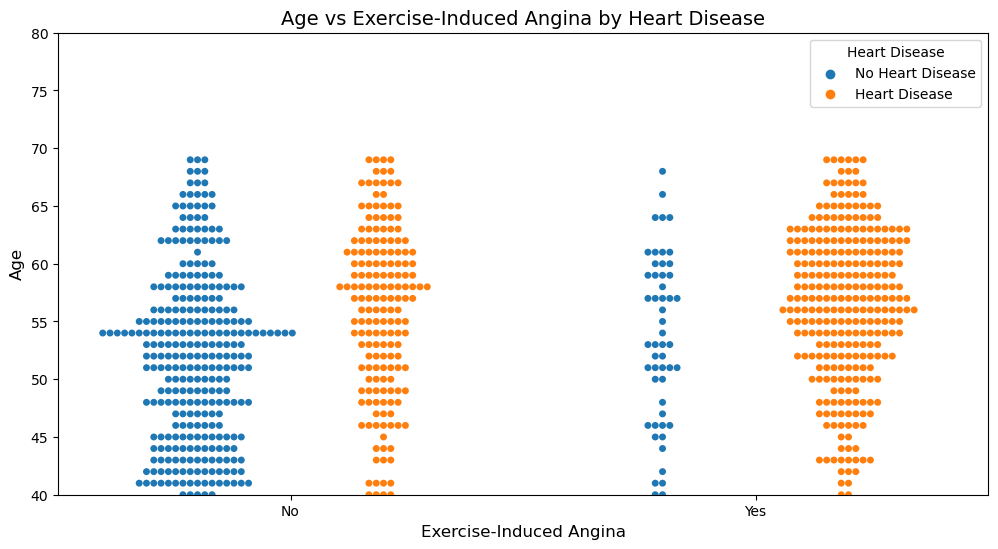

In [35]:
#Swarmplot 
plt.figure(figsize=(12, 6))
sns.swarmplot(x="ExerciseAngina", y="Age", hue="HeartDisease", data=data, dodge=True)
plt.title("Age vs Exercise-Induced Angina by Heart Disease", fontsize=14)
plt.xlabel("Exercise-Induced Angina", fontsize=12)
plt.ylabel("Age", fontsize=12)
plt.legend(title="Heart Disease", loc="upper right")
plt.ylim(40, 80)
plt.show()


From the swarm plot it shows that there is a higher count of heart disease for people with exercised induced angina, with a low number of people who have no heart disease, but still have exercise induced angina. Although there is still a moderate presence of heart disease for those with no exercise induced angina, the majority has no heart disease. 

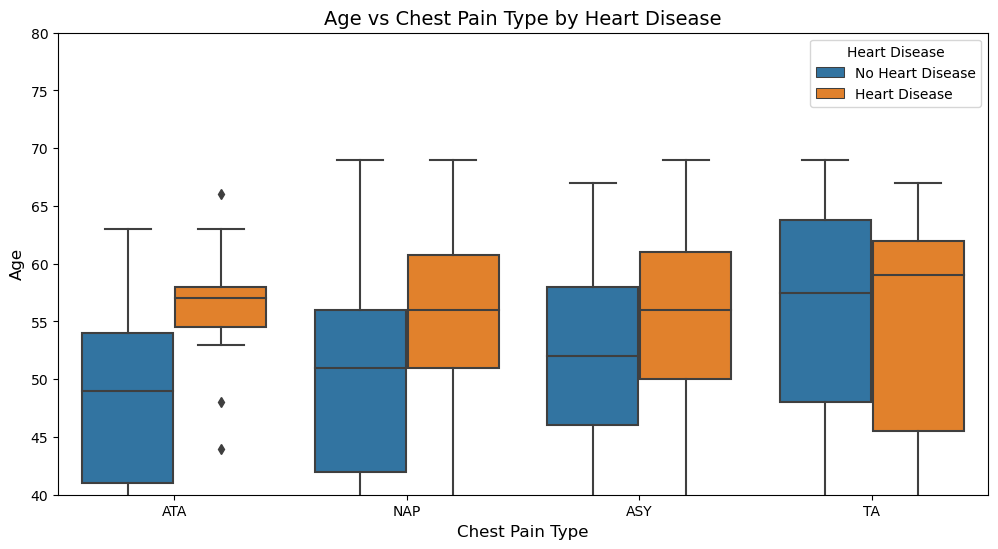

In [36]:
# Box plot for Age vs Chest Pain Type
plt.figure(figsize=(12, 6))
sns.boxplot(x="ChestPainType", y="Age", hue="HeartDisease", data=data)
plt.title("Age vs Chest Pain Type by Heart Disease", fontsize=14)
plt.xlabel("Chest Pain Type", fontsize=12)
plt.ylabel("Age", fontsize=12)
plt.legend(title="Heart Disease", loc="upper right")
plt.ylim(40, 80) 
plt.show()

- From the box plot, the population for ATA shows:
  - A larger number of younger individuals without heart disease.
  - Those with heart disease tend to be older.

- For people with NAP:
  - There is a similar pattern to those with ATA.
  - Age seems correlated with heart disease, particularly in those experiencing this type of chest pain.

- Among people with ASY:
  - The trend is consistent with ATA and NAP, showing older age in individuals with heart disease.

- For those with TA:
  - The population is roughly equally distributed between individuals with and without heart disease.
  - However, those without heart disease appear to be slightly older compared to those with heart disease.


# Discussion 

In conclusion, the analysis supports my hypothesis, does the likelihood of heart disease increase with age? From the first graph, it was observed that individuals aged below 54 had a higher proportion of people without heart disease compared to those with it. However, for individuals aged 54 and older, the trend reversed, with a greater proportion of people affected by heart disease. This finding is further supported by the histogram, where the bell curve shows the highest population density of people with heart disease is concentrated in the 50s to 60s age group. Additionally, the scatter plot reinforces this trend, as it demonstrates that the likelihood of heart disease increases with age, further validating the hypothesis.

The analysis also identified several factors contributing to heart disease that are linked with age, including cholesterol levels, sex, chest pain type, exercise-induced angina, and ST-T wave abnormalities. A closer examination of cholesterol revealed that cholesterol levels tend to increase with age, and individuals with cholesterol levels exceeding 200 mg/dL were more likely to have heart disease than those with lower levels. This finding highlights the realtionship between aging and elevated cholesterol on the risk of heart disease.

Another observation is the role of sex in heart disease prevalence. Although the dataset contains a disproportionate number of males compared to females, males showed a higher ratio of heart disease cases compared to females. Specifically, a higher proportion of females did not have heart disease, but this analysis may not be accurate due to the imbalance in the dataset, which may skew the results.

The analysis also uncovered trends related to ST-T wave abnormalities (ST_Slope) and exercise-induced angina. According to the boxplot, individuals with a flat or downward-sloping ST segment were generally older and more likely to have heart disease, whereas those with an upward-sloping ST segment were younger and less likely to be affected. Similarly, the swarm plot revealed that people with exercise-induced angina had a higher prevalence of heart disease, while those without angina were mainly unaffected, although a moderate number of cases were still present in this group. Another factor observed, chest pain types (ATA, NAP, ASY, TA), which revealed important patterns. For individuals with ATA (Atypical Angina), younger people were more likely to be free from heart disease, whereas older individuals often had the condition. A similar trend was observed for those with NAP (Non-Anginal Pain), where age was positively correlated with heart disease prevalence. In ASY (Asymptomatic) cases, older individuals once again showed a higher prevalence of heart disease. For TA (Typical Angina), the population was more evenly distributed between those with and without heart disease, although those without the condition appeared slightly older on average.

In summary, the analysis strongly suggests that age is a significant factor associated with the prevalence of heart disease. Other factors, such as sex, ST slope, cholesterol levels, and chest pain types, also contribute to this correlation. These results reinforce the conclusion that aging, impacts the likelihood of developing heart disease.

# References

1. Government of Canada: https://www.canada.ca/en/public-health/services/diseases/heart-health/heart-diseases-conditions.html
2. Kaggle: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction 
3. Seaborn: https://seaborn.pydata.org/index.html 
4. Cardiovascular Business: https://cardiovascularbusiness.com/topics/clinical/acute-coronary-syndromes/study-signs-most-common-symptoms-6-cardiovascular-diseases

## LLM Prompts

- How do I fit my bell curve on the histogram?
- How do I fit my treadline on my scatter plot?